# Gramener Case Study

In [1]:
#Load required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:/Users/mohan/Desktop/Data Science")

In [3]:
#Reading the data
loan = pd.read_csv("loan.csv", low_memory = False)

In [5]:
#Inspecting dataset
loan.shape
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

#### As we have more than 111 variables, It will be difficult to check total null values for each variable. 
#### Instead, we will be counting values  and grouping them w.r.t % of missing

In [6]:
loan_nulls = loan.isnull().sum()
loan_nulls_percent = round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_nulls_detials = pd.concat([loan_nulls, loan_nulls_percent], axis=1)
loan_nulls_detials.rename(columns={0: 'no_of_nulls', 1: 'percent_of_nulls'}, inplace=True)
loan_nulls_detials.groupby(['percent_of_nulls']).agg('count').reset_index() 

,percent_of_nulls,no_of_nulls
0,0.00,43
1,0.01,1
2,0.03,1
3,0.10,1
4,0.13,1
5,0.14,2
6,0.18,1
7,1.75,1
8,2.71,1
9,6.19,1


#### We have almost half of the variables which have 100% null value. 
#### We will be dropping variables with 90% null values

In [8]:
loan = loan.dropna(thresh = len(loan) * .1, axis = 1)
print(loan.shape)
loan.head(10)

(39717, 55)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### There are some variables with only single value i.e 0 or same type of unique value.
#### We will be dropping that data as well

In [9]:
# Validate all values in column is same by checking unique values in clumn
uniques = loan.apply(lambda x:x.nunique())
print(uniques)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
# Remove columns where unique values are same as it illustrates that all values are same in column
loan = loan.drop(uniques[uniques <= 1].index, axis = 1)
print(loan.shape)
loan.head()

(39717, 46)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## Business Metrics

The varibales in the data set can be divided into 3 types of variables

1) Customer driven variables (Data that a Customer fill in application)

2) Loan Variables (Data regarding the loan)

3) Customer behaviour (Data regarding the customer behaviour)

- As of our problem statement, we need to analyse regarding the defaulted loans. 
- So we as for the problem statement we don't need the customer behaviour variables.
- They can be used in future for modeling purpose but for as of now we will be conidering only two types of variables
  `Customer data` & `Loan Data` 


In [11]:
#Dropping Customer Behaviour variables
loan = loan.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','out_prncp_inv','total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','total_rec_int','out_prncp','revol_util','mths_since_last_delinq','pub_rec_bankruptcies'],axis=1)

In [12]:
loan.shape

(39717, 24)

In [13]:
#Checking the null value pecentage in remaining variables
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
url                     0.00
desc                   32.58
purpose                 0.00
title                   0.03
zip_code                0.00
addr_state              0.00
dti                     0.00
dtype: float64

## Dropping high percentage null values and some nominal Variables

We will be dopping some nominal variables like address and zip code

desc and emp title can be used for some modeling analysis but for the problem statement they are not much useful

In [14]:
loan = loan.drop(columns = ['url','desc','emp_title','title','zip_code','addr_state'], axis = 1)

In [16]:
print(loan.shape)
loan.head()

(39717, 18)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94


In [17]:
#Converting required variables to analysis format
loan['int_rate'] = loan['int_rate'].str.replace("%","")
loan['int_rate'] = pd.to_numeric(loan['int_rate'])
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08


In [18]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti'],
      dtype='object')

In [19]:
#converting variables from factor to categorical
for col in ['term', 'grade', 'sub_grade', 'emp_length','home_ownership','verification_status','loan_status','purpose']:
    loan[col] = loan[col].astype('category')

In [20]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08


#### Check whether there are any duplicates in id and member_id

In [21]:
loan_id = loan["id"]
loan[loan_id.isin(loan_id[loan_id.duplicated()])].sort_values("id")
customer_id = loan["member_id"]
loan[customer_id.isin(customer_id[customer_id.duplicated()])].sort_values("member_id")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti


In [22]:
#Converting date to correct format
loan['issue_d'] = pd.to_datetime(loan.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [23]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                         category
int_rate                      float64
installment                   float64
grade                        category
sub_grade                    category
emp_length                   category
home_ownership               category
annual_inc                    float64
verification_status          category
issue_d                datetime64[ns]
loan_status                  category
purpose                      category
dti                           float64
dtype: object

In [24]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94


# Exploratory data analysis
## Univariate Analysis

For our analysis we have 

Categorical variables: purpose, home_ownership, emp_length, grade, sub_grade, verification_status and term

Quantitative Variables: loan_amt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti

Target variable: loan_status

#### We will be considering only `Fully paid` and ` Charged Off` as Current is still on going loan and we cannot draw any analysis from it
#### Fully Paid can be consisdered ad `Non Defaulted loans` and  Charged Off can be termed as `Defaulted loans`

In [25]:
loan = loan.loc[loan['loan_status'].isin(['Fully Paid', 'Charged Off']), :]
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20


In [26]:
loan['loan_status'] = ["Charged Off" if x in ['Charged Off','Current'] else "Fully Paid" for x in loan['loan_status'] ]
loan.shape

(38577, 18)

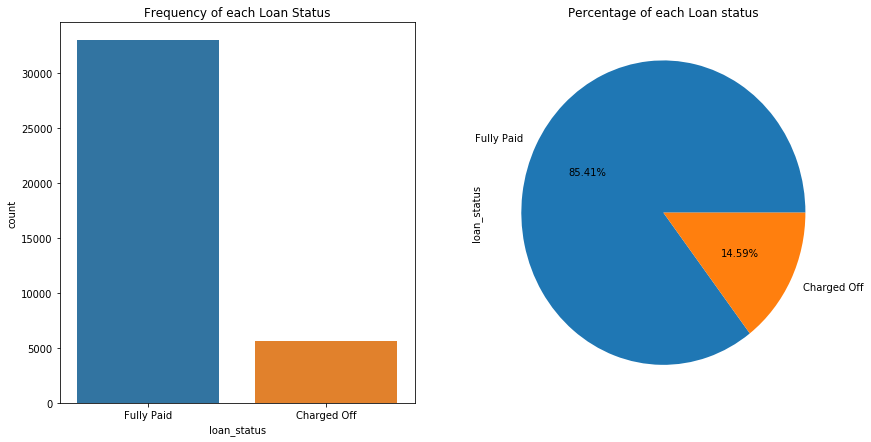

In [32]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loan ,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

### From the above graphs we can clearly say that 14.6% of loans are `Defaulted`

In [27]:
def category_univariate_analysis(column_name):
    df = loan.groupby('loan_status')[column_name].value_counts(ascending=False)\
                            .unstack(level=0).reset_index()
    df['Charged Off'].fillna(value=0, inplace=True)
    df['Total'] = df['Charged Off'] + df['Fully Paid']
    df['Distribution'] = round((df['Total'] * 100 / loan['id'].count()),2)
    df['Charged_Off_Percent'] = round(df['Charged Off'] * 100 /df['Total'],2)
    df['Fully_Paid_Percent'] = round(df['Fully Paid'] * 100 /df['Total'],2)
    return df

### Purpose v/s Default

In [28]:
purpose_analysis = category_univariate_analysis('purpose')
purpose_analysis

loan_status,purpose,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,car,160,1339,1499,3.89,10.67,89.33
1,credit_card,542,4485,5027,13.03,10.78,89.22
2,debt_consolidation,2767,15288,18055,46.80,15.33,84.67
3,educational,56,269,325,0.84,17.23,82.77
4,home_improvement,347,2528,2875,7.45,12.07,87.93
5,house,59,308,367,0.95,16.08,83.92
6,major_purchase,222,1928,2150,5.57,10.33,89.67
7,medical,106,575,681,1.77,15.57,84.43
8,moving,92,484,576,1.49,15.97,84.03
9,other,633,3232,3865,10.02,16.38,83.62


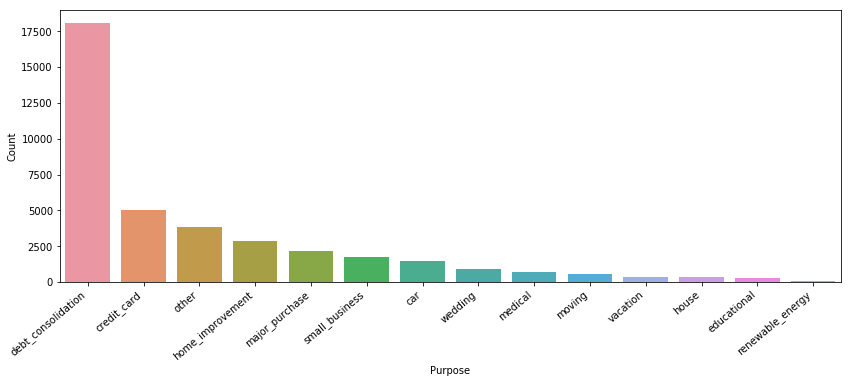

In [29]:
# For unordered categorical variables, use count plot
# count plot for 'purpose'
plt.figure(figsize=(14, 5))
fig = sns.countplot(loan.purpose.dropna(), order = loan.purpose.value_counts().index)
fig.set(xlabel='Purpose', ylabel='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()

From the above plot we are are clearly able to know that `debt_consolidation`,`credit_card`,`other`&`home_improvement` consists 80% of data

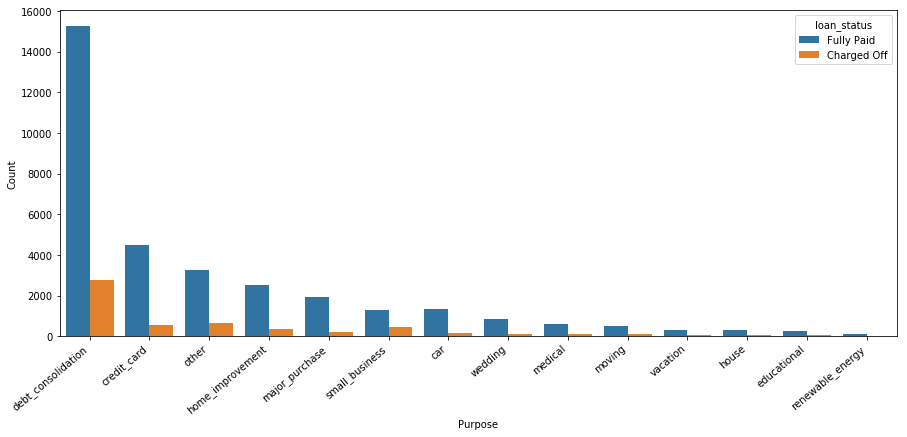

In [30]:
plt.figure(figsize=(15,6))
fig = sns.countplot(loan.purpose.dropna(), order = loan.purpose.value_counts().index, hue=loan.loan_status.dropna())
fig.set(xlabel='Purpose', ylabel='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()

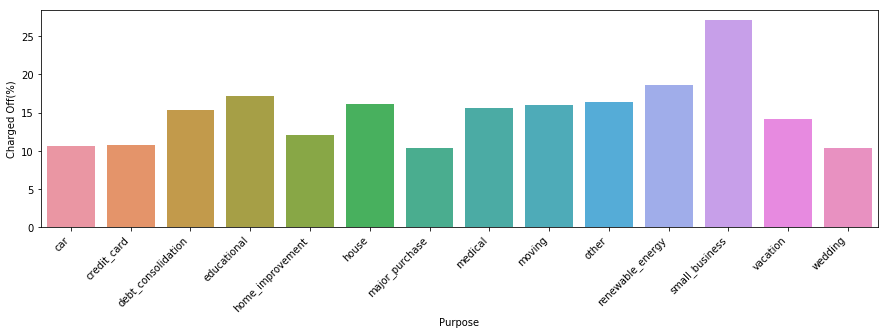

In [31]:
plt.figure(figsize=(15,4))
g = sns.barplot(x="purpose", y="Charged_Off_Percent", data=purpose_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Purpose')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha='right')
plt.show()

#### As our average Defaulted is around 14.5% we cannot say particular purpose lead to default loan but we can certainly sure that `small business` have high rate of default when compared to other type of purpose

### Home Ownership vs Default

In [33]:
home_ownership_analysis = category_univariate_analysis('home_ownership')
home_ownership_analysis

loan_status,home_ownership,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,MORTGAGE,2327.0,14694.0,17021.0,44.12,13.67,86.33
1,NONE,0.0,3.0,3.0,0.01,0.00,100.00
2,OTHER,18.0,80.0,98.0,0.25,18.37,81.63
3,OWN,443.0,2532.0,2975.0,7.71,14.89,85.11
4,RENT,2839.0,15641.0,18480.0,47.90,15.36,84.64


[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

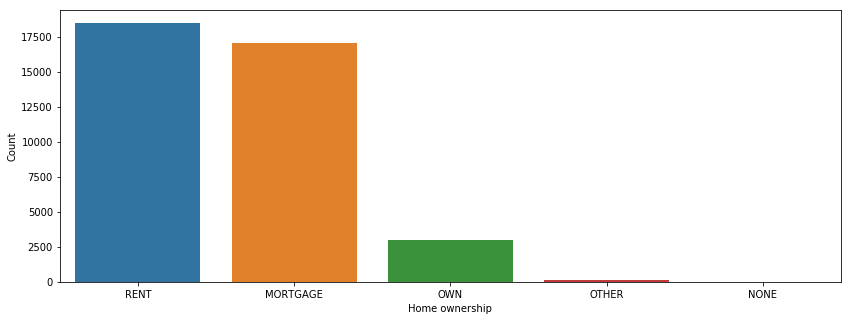

In [34]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.home_ownership.dropna(), order = loan.home_ownership.value_counts().index)
fig.set(xlabel='Home ownership', ylabel='Count')

[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

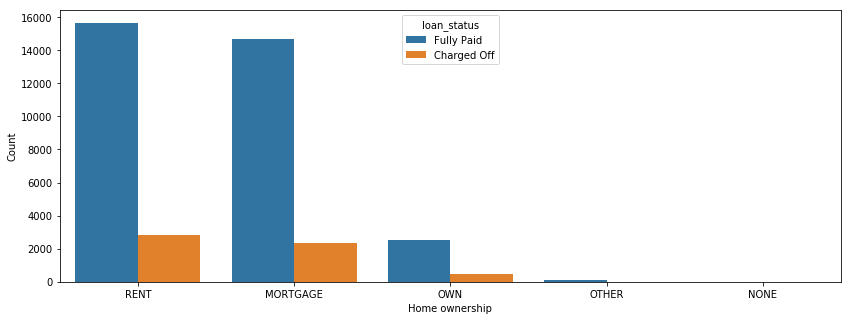

In [35]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.home_ownership.dropna(), order = loan.home_ownership.value_counts().index,hue=loan.loan_status)
fig.set(xlabel='Home ownership', ylabel='Count')

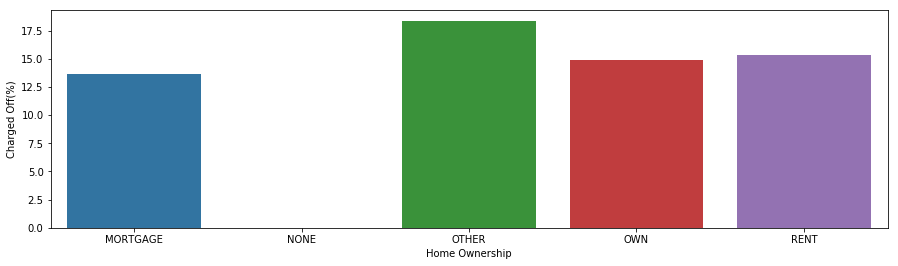

In [36]:
plt.figure(figsize=(15,4))
sns.barplot(x="home_ownership", y="Charged_Off_Percent", data=home_ownership_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Home Ownership')
plt.show()

From above plot we are not much sure about what kind of home_ownership lead to loan default

### Verfication Status vs Default

In [37]:
verification_status_analysis = category_univariate_analysis('verification_status')
verification_status_analysis

loan_status,verification_status,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,Not Verified,2142,14552,16694,43.27,12.83,87.17
1,Source Verified,1434,8243,9677,25.08,14.82,85.18
2,Verified,2051,10155,12206,31.64,16.80,83.20


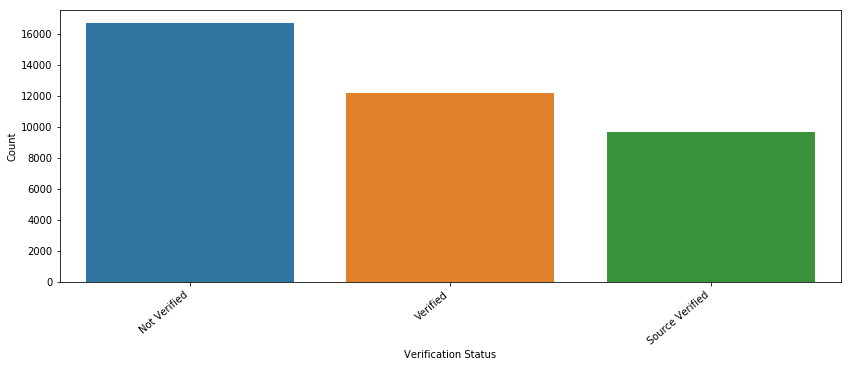

In [38]:
# count plot for home_ownership
plt.figure(figsize=(14, 5))
fig = sns.countplot(loan.verification_status.dropna(), order = loan.verification_status.value_counts().index)
fig.set(xlabel='Verification Status', ylabel='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()

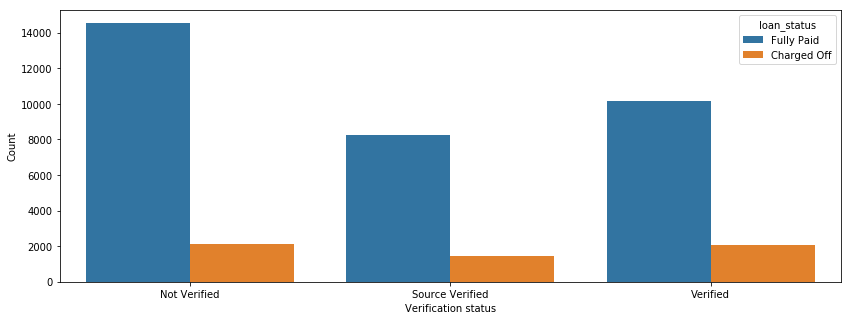

In [39]:
#Countplot for default and non default loans 
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.verification_status.dropna(),hue=loan.loan_status)
fig.set(xlabel='Verification status', ylabel='Count')
plt.show()

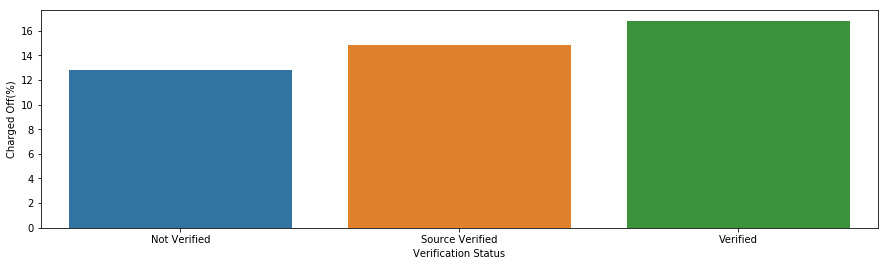

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(x="verification_status", y="Charged_Off_Percent", data=verification_status_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Verification Status')
plt.show()

#### we can slearly see that verified loans have higher default rate when comapared to non verified loans.

### Grade vs Default

In [41]:
grade_analysis = category_univariate_analysis('grade')
grade_analysis

loan_status,grade,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,A,602,9443,10045,26.04,5.99,94.01
1,B,1425,10250,11675,30.26,12.21,87.79
2,C,1347,6487,7834,20.31,17.19,82.81
3,D,1118,3967,5085,13.18,21.99,78.01
4,E,715,1948,2663,6.90,26.85,73.15
5,F,319,657,976,2.53,32.68,67.32
6,G,101,198,299,0.78,33.78,66.22


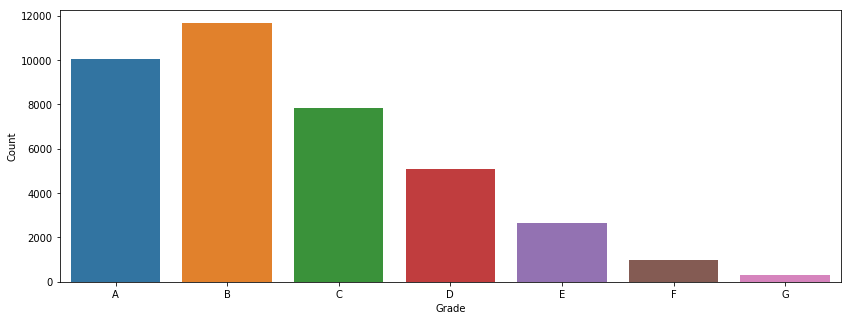

In [42]:
#Countplot for grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.grade.dropna())
fig.set(xlabel='Grade',ylabel='Count')
plt.show()

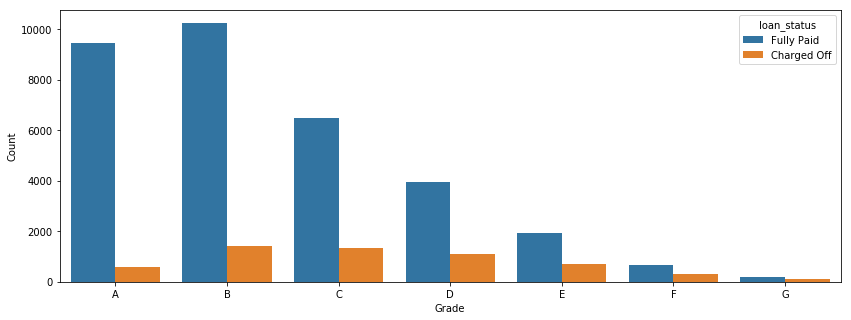

In [43]:
#Countplot for default and non default for grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.grade.dropna(),hue=loan.loan_status)
fig.set(xlabel='Grade', ylabel='Count')
plt.show()

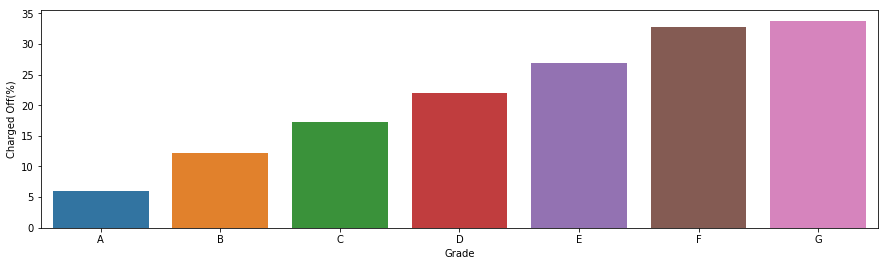

In [44]:
#Default rate for each grade
plt.figure(figsize=(15,4))
sns.barplot(x="grade", y="Charged_Off_Percent", data=grade_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Grade')
plt.show()

#### From  above analysis it can be said the higher the grade (where G been highest and A been lowest) i.e higher the interest rate greater is the chance of loan default

### Sub Grade vs Default

In [45]:
subgrade_analysis = category_univariate_analysis('sub_grade')
subgrade_analysis

loan_status,sub_grade,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,A1,30,1109,1139,2.95,2.63,97.37
1,A2,74,1434,1508,3.91,4.91,95.09
2,A3,103,1707,1810,4.69,5.69,94.31
3,A4,178,2695,2873,7.45,6.20,93.80
4,A5,217,2498,2715,7.04,7.99,92.01
5,B1,171,1626,1797,4.66,9.52,90.48
6,B2,228,1773,2001,5.19,11.39,88.61
7,B3,341,2484,2825,7.32,12.07,87.93
8,B4,329,2108,2437,6.32,13.50,86.50
9,B5,356,2259,2615,6.78,13.61,86.39


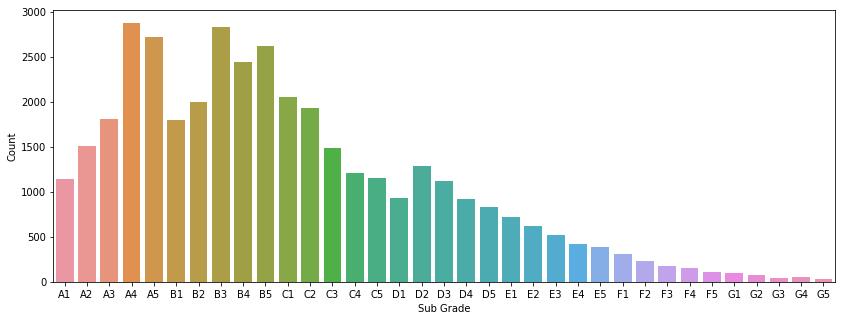

In [46]:
#Countplot for sub_grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.sub_grade.dropna())
fig.set(xlabel='Sub Grade',ylabel='Count')
plt.show()

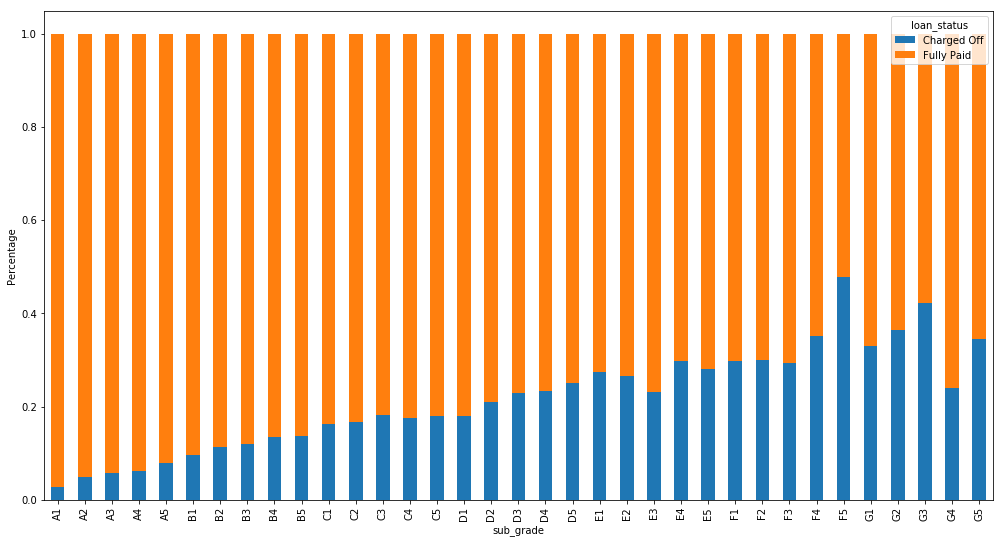

In [47]:
#Default and Non default distribution for subgrade
subgrade=pd.crosstab(loan['sub_grade'],loan['loan_status'])
subgrade.div(subgrade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,9))
plt.xlabel('sub_grade')
p = plt.ylabel('Percentage')

####  Grade F5 & G3 are top most sub-grades which will have higher default rate

### Emp length vs Default

In [48]:
emp_length_analysis = category_univariate_analysis('emp_length')
emp_length_analysis

loan_status,emp_length,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,1 year,456,2713,3169,8.21,14.39,85.61
1,10+ years,1331,7157,8488,22.00,15.68,84.32
2,2 years,567,3724,4291,11.12,13.21,86.79
3,3 years,555,3457,4012,10.40,13.83,86.17
4,4 years,462,2880,3342,8.66,13.82,86.18
5,5 years,458,2736,3194,8.28,14.34,85.66
6,6 years,307,1861,2168,5.62,14.16,85.84
7,7 years,263,1448,1711,4.44,15.37,84.63
8,8 years,203,1232,1435,3.72,14.15,85.85
9,9 years,158,1068,1226,3.18,12.89,87.11


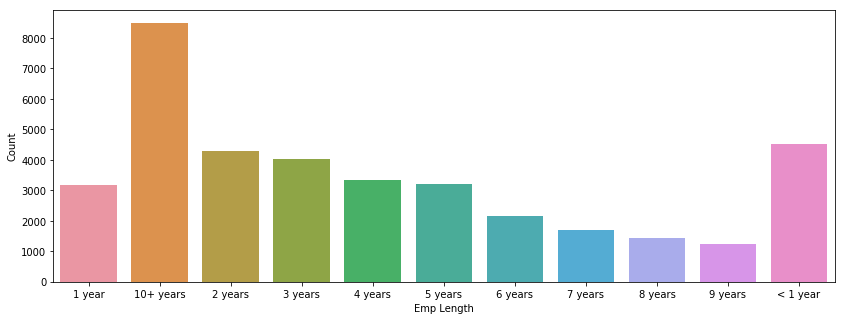

In [49]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.emp_length)
fig.set(xlabel='Emp Length',ylabel='Count')
plt.show()

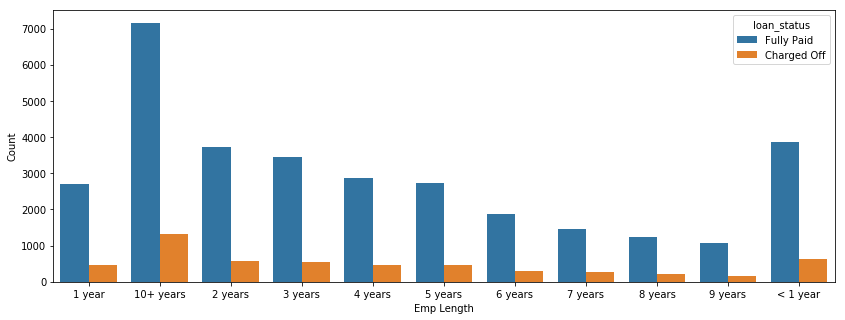

In [50]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.emp_length ,hue=loan.loan_status)
fig.set(xlabel='Emp Length', ylabel='Count')
plt.show()

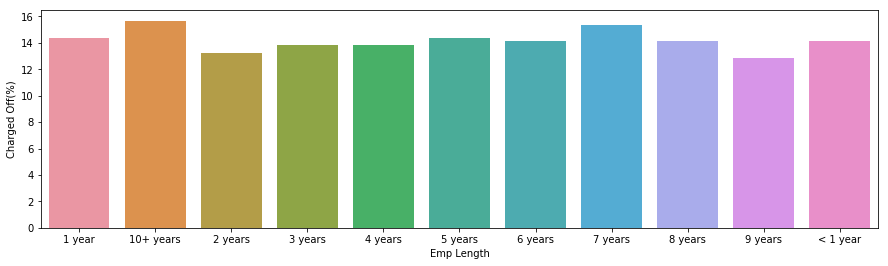

In [51]:
#Default rate for each emp_length
plt.figure(figsize=(15,4))
sns.barplot(x="emp_length", y="Charged_Off_Percent", data=emp_length_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Emp Length')
plt.show()

#### From  above analysis it is difficult to say employement length  has any impact on loan deaults as records which have no employment records available default most

### Term vs Default

In [52]:
term_analysis = category_univariate_analysis('term')
term_analysis

loan_status,term,Charged Off,Fully Paid,Total,Distribution,Charged_Off_Percent,Fully_Paid_Percent
0,36 months,3227,25869,29096,75.42,11.09,88.91
1,60 months,2400,7081,9481,24.58,25.31,74.69


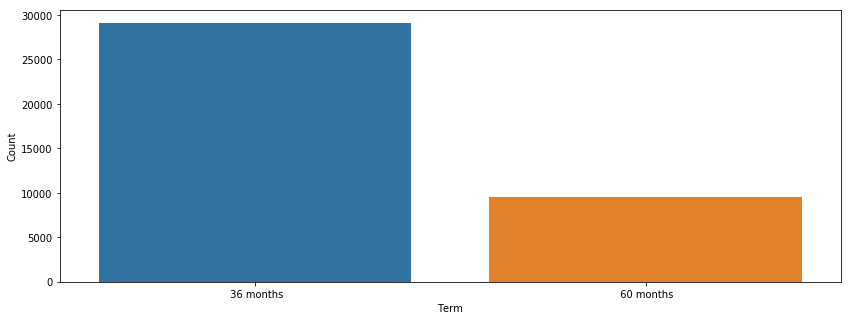

In [53]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.term.dropna())
fig.set(xlabel='Term',ylabel='Count')
plt.show()

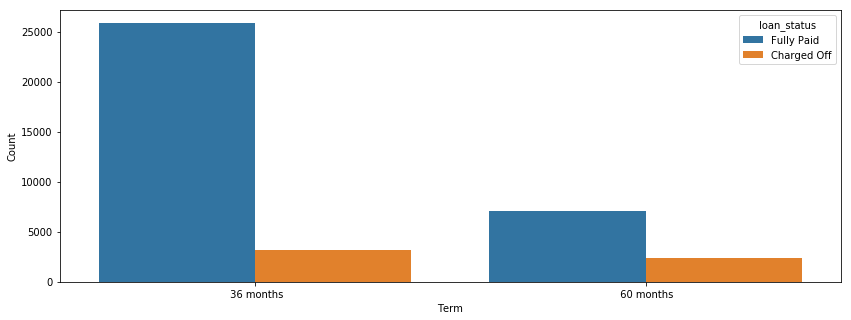

In [54]:
plt.figure(figsize=(14,5))
fig = sns.countplot(loan.term ,hue=loan.loan_status)
fig.set(xlabel='Term', ylabel='Count')
plt.show()

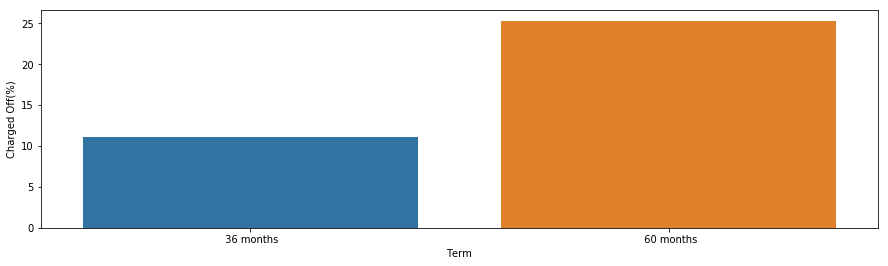

In [55]:
# Default rate for term
plt.figure(figsize=(15,4))
g = sns.barplot(x="term", y="Charged_Off_Percent", data=term_analysis)\
    .set(ylabel='Charged Off(%)', xlabel='Term')
plt.show()

#### It can be clearly said that higher the term more the chance for default

## Quatitative variable univariate analysis

### Interest Rate vs Default

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


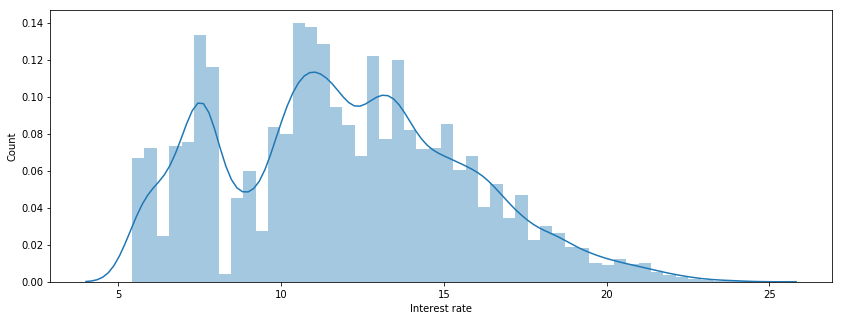

In [56]:
# Distibution plot for Interest Rate
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['int_rate'])
fig.set(xlabel='Interest rate',ylabel='Count')
plt.show()

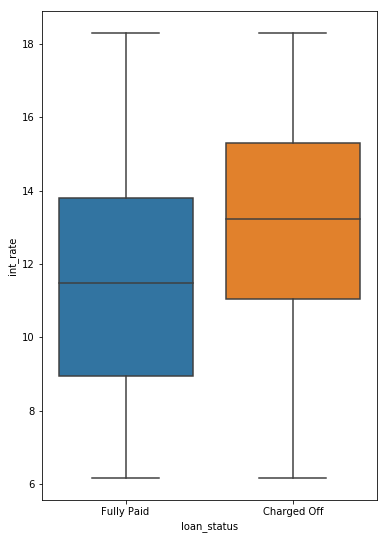

In [57]:
plt.figure(figsize=(6,9))
low, high = loan.int_rate.quantile([0.05, 0.95])
ax = sns.boxplot(x="loan_status", y="int_rate", data=loan[loan.int_rate.between(low,high)])
plt.show()

#### From the above analysis it can be said that higher the value of Interest rate, greater is the chance of loan default.
As we can see the median quite high for defaulted loans.

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


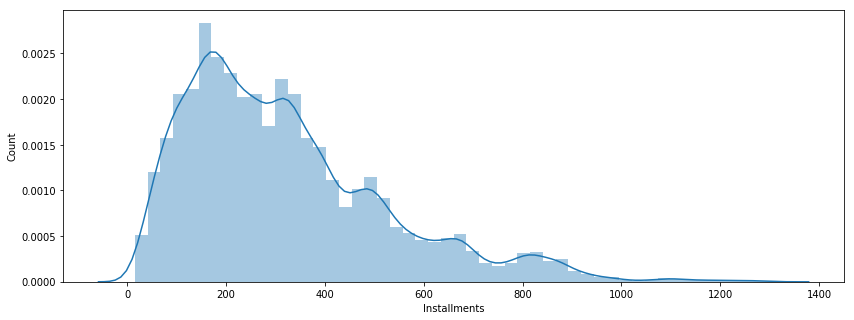

In [78]:
# Distibution plot for Installment
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['installment'])
fig.set(xlabel='Installments',ylabel='Count')
plt.show()

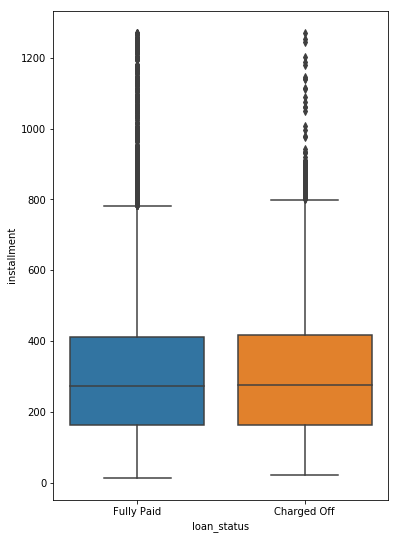

In [79]:
plt.figure(figsize=(6,9))
low, high = loan.int_rate.quantile([0.05, 0.95])
ax = sns.boxplot(x="loan_status", y="installment", data=loan[loan.int_rate.between(low,high)])
plt.show()

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


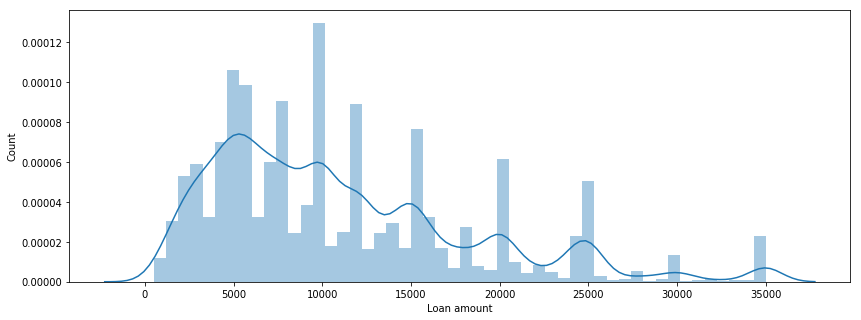

In [58]:
# Distribution plot for loan amount
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['loan_amnt'])
fig.set(xlabel='Loan amount',ylabel='Count')
plt.show()

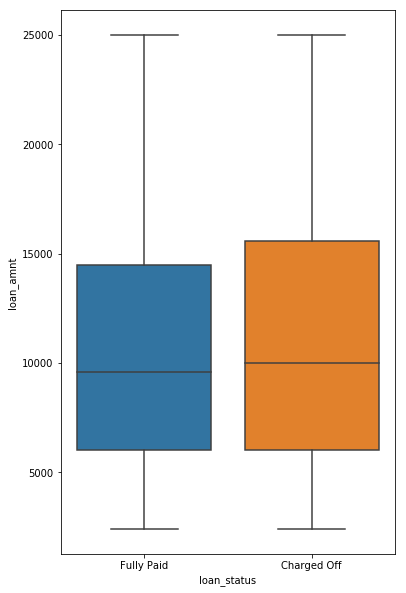

In [59]:
plt.figure(figsize=(6,10))
low, high = loan.loan_amnt.quantile([0.05, 0.95])
ax = sns.boxplot(x="loan_status", y="loan_amnt", data=loan[loan.loan_amnt.between(low,high)])
plt.show()

#### From the above analysis it can be said that higher the value of loan_amount , greater is the chance of loan default.
We can see that defaulted loans have higher spread than the Fully paid load implying higher the value there ratio greater the risk of loan default

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


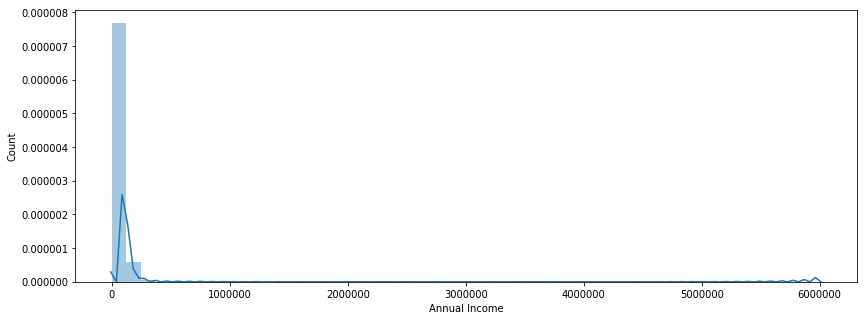

In [60]:
# Distribution plot for annual income
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')
plt.show()

In [61]:
# We can clearly see there is a very high outliers in the annual income

# So we will be cleaning the outliers

loan["annual_inc"].describe()
percent95 = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < percent95]
loan["annual_inc"].describe()

count     38359.000000
mean      66156.572040
std       37321.342395
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      294000.000000
Name: annual_inc, dtype: float64

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


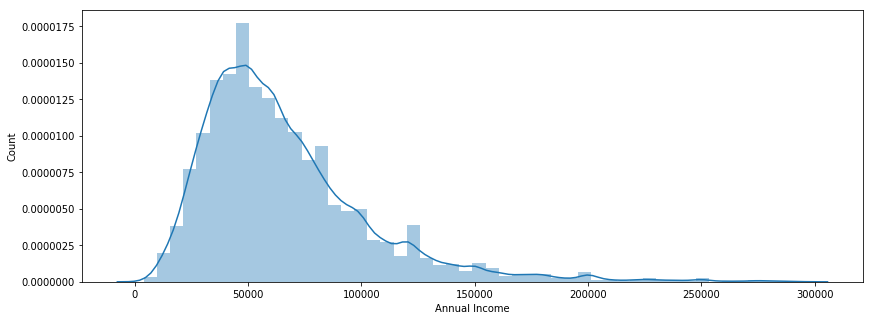

In [62]:
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')
plt.show()

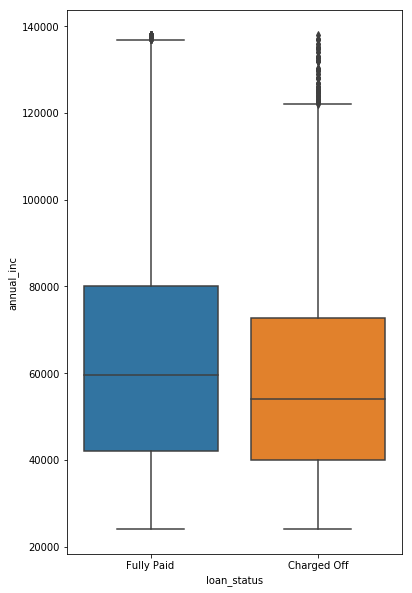

In [63]:
plt.figure(figsize=(6,10))
low, high = loan.annual_inc.quantile([0.05, 0.95])
ax = sns.boxplot(x="loan_status", y="annual_inc", data=loan[loan.annual_inc.between(low,high)])
plt.show()

#### From the above analysis it can be said that lower the value of the annual income , greater is the chance of loan default.
We can see that defaulted loans have higher spread than the Fully paid load implying higher the value there ratio greater the risk of loan default

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


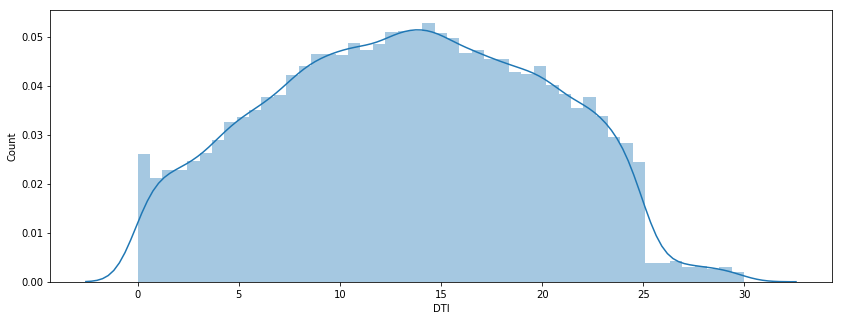

In [64]:
# Distribution plot for dti
plt.figure(figsize=(14,5))
fig = sns.distplot(loan['dti'])
fig.set(xlabel='DTI',ylabel='Count')
plt.show()

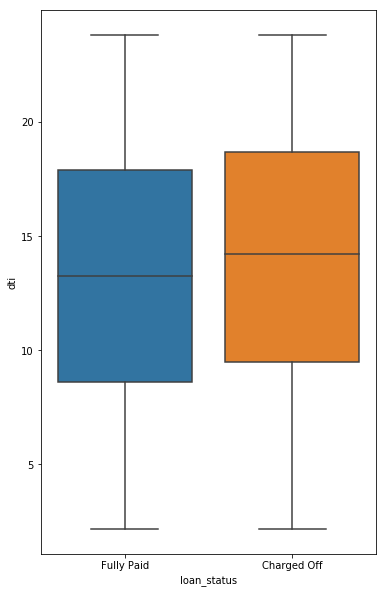

In [65]:
plt.figure(figsize=(6,10))
low, high = loan.dti.quantile([0.05, 0.95])
ax = sns.boxplot(x="loan_status", y="dti", data=loan[loan.dti.between(low,high)])
plt.show()

Observations:

    DTI : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

## Derived Metrics

### As we cannot be certainly sure about interest rate and annual income default 
### We will be dividing them into buckets and do the analysis

In [67]:
#Dividing to bins
bins = [0, 20000, 40000, 60000, 80000,100000,500000]
bin_labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bin_labels)
loan[['annual_inc','annual_inc_range']].head(5)

,annual_inc,annual_inc_range
0,24000.0,20000-40000
1,30000.0,20000-40000
2,12252.0,0-20000
3,49200.0,40000-60000
5,36000.0,20000-40000


loan_status       Charged Off  Fully Paid
annual_inc_range                         
0-20000                   237         943
20000-40000              1514        7004
40000-60000              1729        9534
60000-80000              1024        6597
80000-100000              531        3983
100000 and above          568        4695


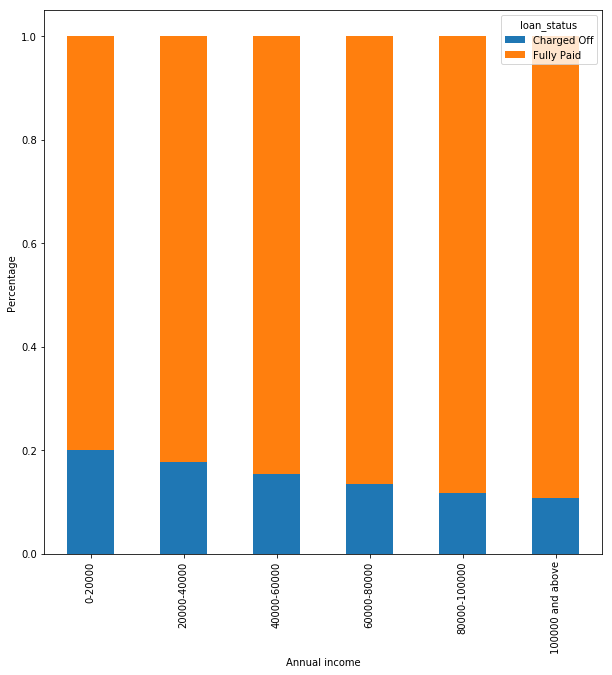

In [68]:
print(pd.crosstab(loan['annual_inc_range'],loan['loan_status']))

purpose=pd.crosstab(loan['annual_inc_range'],loan['loan_status'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Annual income')
p = plt.ylabel('Percentage')

#### Applicants with lesser annual income default the most 

In [69]:
bins = [0, 7.5, 10, 12.5, 15,20]
bin_labels = ['0-7.5','7.5-10', '10-12.5', '12.5-15','15-above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bin_labels)
loan[['int_rate','int_rate_range']].head(5)

,int_rate,int_rate_range
0,10.65,10-12.5
1,15.27,15-above
2,15.96,15-above
3,13.49,12.5-15
5,7.90,7.5-10


loan_status     Charged Off  Fully Paid
int_rate_range                         
0-7.5                   256        5099
7.5-10                  572        6345
10-12.5                1226        8108
12.5-15                1471        7361
15-above               1786        5383


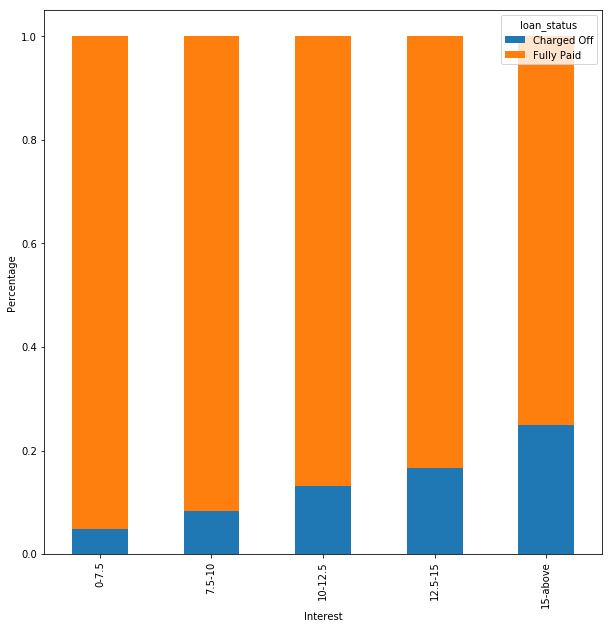

In [70]:
print(pd.crosstab(loan['int_rate_range'],loan['loan_status']))

purpose=pd.crosstab(loan['int_rate_range'],loan['loan_status'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Interest')
p = plt.ylabel('Percentage')

#### Loans with higher interest are defaulted the most 

## Bivariate Analysis

In [75]:
# Driving corelation of charged_off and fully_paid with other columns.
corr = loan.corr()
corr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
id,1.000000,0.993539,0.119825,0.130456,0.230996,0.053308,0.075199,0.029225,0.090517
member_id,0.993539,1.000000,0.119699,0.129578,0.240843,0.050169,0.070095,0.029670,0.091737
loan_amnt,0.119825,0.119699,1.000000,0.981854,0.937895,0.299507,0.931987,0.416429,0.067800
funded_amnt,0.130456,0.129578,0.981854,1.000000,0.956080,0.303627,0.957782,0.412350,0.067302
funded_amnt_inv,0.230996,0.240843,0.937895,0.956080,1.000000,0.296184,0.905004,0.394456,0.075425
int_rate,0.053308,0.050169,0.299507,0.303627,0.296184,1.000000,0.276042,0.069421,0.113299
installment,0.075199,0.070095,0.931987,0.957782,0.905004,0.276042,1.000000,0.415150,0.057401
annual_inc,0.029225,0.029670,0.416429,0.412350,0.394456,0.069421,0.415150,1.000000,-0.116764
dti,0.090517,0.091737,0.067800,0.067302,0.075425,0.113299,0.057401,-0.116764,1.000000


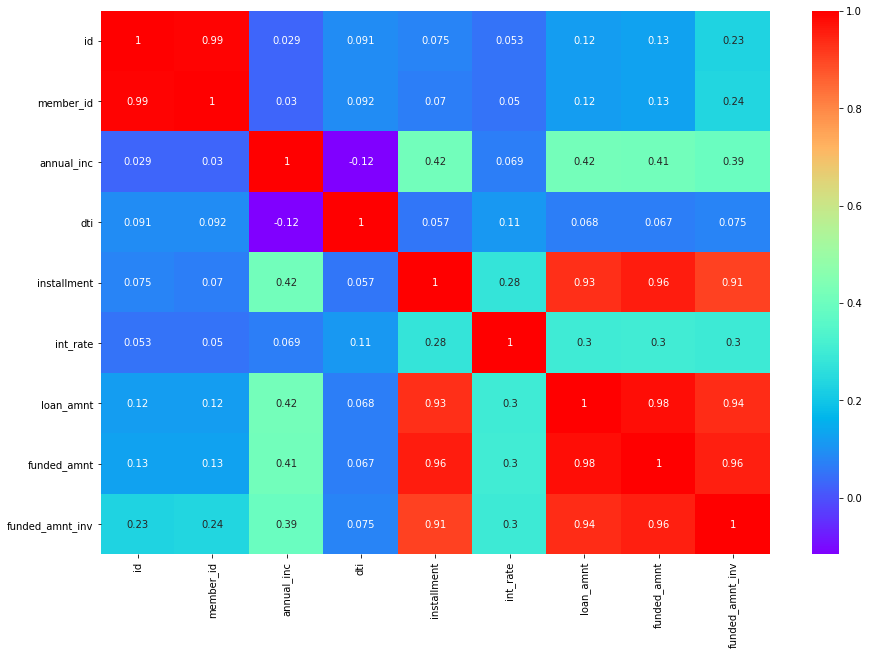

In [82]:
loan_df = loan[['id','member_id','annual_inc','dti','installment','int_rate','loan_amnt','funded_amnt','funded_amnt_inv']].copy()
plt.figure(figsize = (15,10))
sns.heatmap(loan_df.corr(),annot=True,cmap='rainbow')
plt.show()

## Conclusions

Above trend shows co relation inwhich negative means decrease in attribute value increase the probability of the event and positve means increase in attribute value increase the probability of the event.

1) Most of the loans are taken to consolidate debts from other loans.

2) Majority of applicants stay in rented or mortgaged house.

3) Verification status does not seem to be of significance since most of the applicants are not verified.

4) A considerable number of applicants have charged off.

5) About 70% of the loans are for a tenure of 36 months.

6) Grade does not seem to have any clear pattern - needs more analysis.

7) Most of the loan amount is between 5000-20000 USD.

8) A large portion of the applicants have an annual income of 50000 to 100000 USD.

9) THe most prevalent interest rates are 12 to 16 percent.

10) DTI needs to be further analysed.

11) Low Annual Income can cause High Default

12) Instalment to income ratio is driving factor. Having high value means high chances of default.

13) For 60 months term, if the instalment to income ratio is greater than 9%, there is maximum probability of defaulting.

14) Loan taken for 60 month interval has higher chances of defaulting.

15) Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%. So if the loan has higher interest rate (about 15%), there is higher chance of defaulting.

16) Purpose of loan: Loan taken for “small business” has high chances of defaulting.

These above variables most probably influences loan success / unsuccess.